In [1]:
!nvidia-smi

Mon Dec 26 07:22:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 460.27.04    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:18:00.0 Off |                  N/A |
| 22%   30C    P8    20W / 250W |  10542MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:3B:00.0 Off |                  N/A |
| 27%   

In [2]:
from dataset import DatasetProtein
from config import Confiq
from tools import Tools
from torch.utils.data import DataLoader
from model_builder import Transformer  
import engine
import torch
import os

2022-12-26 07:22:28.339385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-26 07:22:28.470064: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-26 07:22:29.001338: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-26 07:22:29.001392: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [4]:
cfg = Confiq()
tool = Tools()
common_family = tool.find_common_family()

device = "cuda" if torch.cuda.is_available() else "cpu"

train_ds= DatasetProtein(cfg.ROOT_PATH, 'train', cfg.AMINO, common_family=common_family)
test_ds= DatasetProtein(cfg.ROOT_PATH, 'test', cfg.AMINO, common_family=common_family)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)


Loading dataset train ...
Dataset train loaded !
Loading dataset test ...
Dataset test loaded !


In [5]:
model = Transformer()
model.to("cuda")

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = torch.nn.CrossEntropyLoss()

result = engine.train(
    model=model,
    train_dataloader=train_loader,
    test_dataloader=test_loader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=100,
    device="cuda"
)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.9349 | train_acc: 0.0506 | test_loss: 3.4439 | test_acc: 0.0796
Epoch: 2 | train_loss: 3.1376 | train_acc: 0.1436 | test_loss: 2.7154 | test_acc: 0.2109
Epoch: 3 | train_loss: 2.4597 | train_acc: 0.2810 | test_loss: 2.2674 | test_acc: 0.3469
Epoch: 4 | train_loss: 2.0148 | train_acc: 0.4145 | test_loss: 1.8843 | test_acc: 0.4383
Epoch: 5 | train_loss: 1.6914 | train_acc: 0.5009 | test_loss: 1.6346 | test_acc: 0.5145
Epoch: 6 | train_loss: 1.4761 | train_acc: 0.5694 | test_loss: 1.3916 | test_acc: 0.6011
Epoch: 7 | train_loss: 1.2414 | train_acc: 0.6451 | test_loss: 1.2124 | test_acc: 0.6547
Epoch: 8 | train_loss: 1.0334 | train_acc: 0.7053 | test_loss: 1.0086 | test_acc: 0.7115
Epoch: 9 | train_loss: 0.8754 | train_acc: 0.7507 | test_loss: 0.8678 | test_acc: 0.7487
Epoch: 10 | train_loss: 0.7462 | train_acc: 0.7883 | test_loss: 0.7671 | test_acc: 0.7814
Epoch: 11 | train_loss: 0.6428 | train_acc: 0.8181 | test_loss: 0.6433 | test_acc: 0.8160
Epoch: 12 | train_l

In [6]:
import matplotlib.pyplot as plt

def plot_history(result):
    acc = result['train_acc']
    val_acc = result['test_acc']
    loss = result['train_loss']
    val_loss = result['test_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

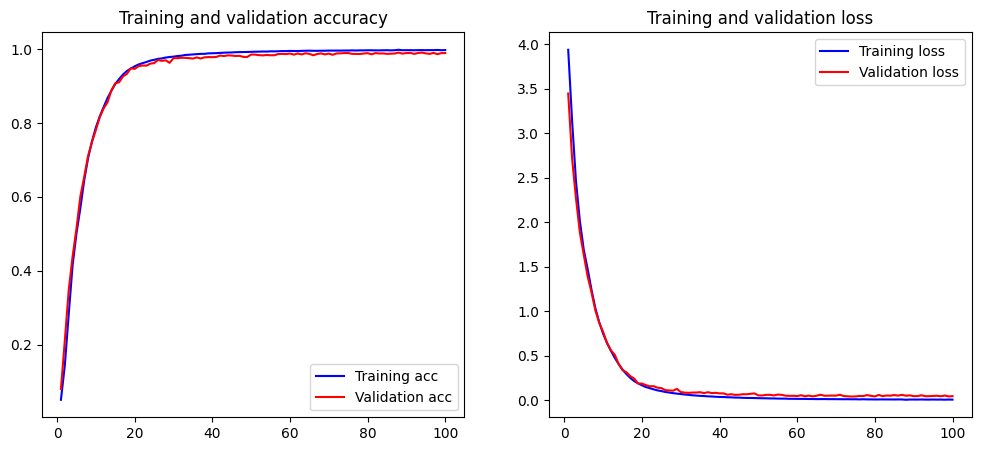

In [7]:
plot_history(result)

In [13]:
torch.save(obj=model.state_dict(), f='/experiment/chaidir/aulia-s3/Protein/model/protein_transformer_100.pth')